<a href="https://colab.research.google.com/github/dakshyanim/100_days_of_ML/blob/main/diwali_salea_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [5]:
diwali_data=pd.read_csv('/content/Diwali Sales Data.csv',encoding='unicode_escape')

In [6]:
diwali_data.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
diwali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#to drop a coloum /row
diwali_data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [9]:
diwali_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
#this data shows there are 12 amount values which are null
pd.isnull(diwali_data).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [11]:
diwali_data.dropna(inplace=True)

In [12]:
diwali_data.shape # we can see 12 items have been dropped

(11239, 13)

In [13]:
pd.isnull(diwali_data).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [14]:
#change data type
diwali_data['Amount']=diwali_data['Amount'].astype('int')

In [15]:
diwali_data['Amount'].dtypes

dtype('int64')

In [16]:
diwali_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Data analysis

gender

<Axes: xlabel='Gender', ylabel='count'>

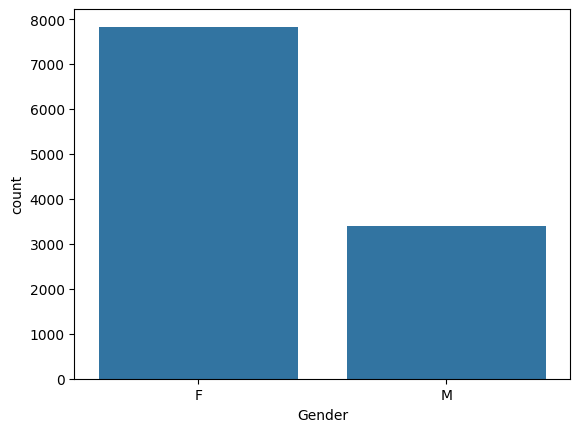

In [17]:
sns.countplot(x='Gender',data=diwali_data)

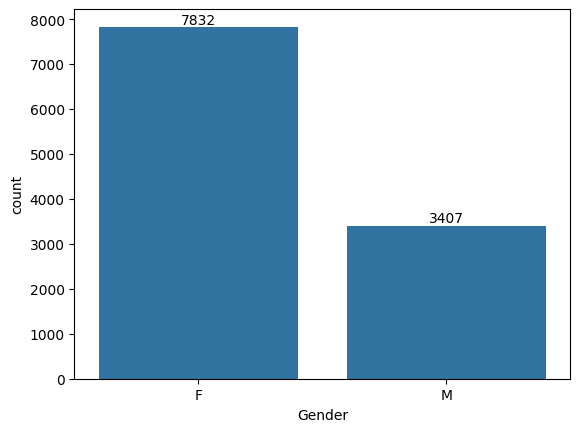

In [18]:
#if you want to display the values in the graph
ax=sns.countplot(x='Gender',data=diwali_data)
for bars in ax.containers:
  ax.bar_label(bars)

In [19]:
# to find the amount of money paid by the 2 genders

diwali_data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


In [20]:

sale_gen=diwali_data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False) #saving the data in a variable for plotting the graph

<Axes: xlabel='Gender', ylabel='Amount'>

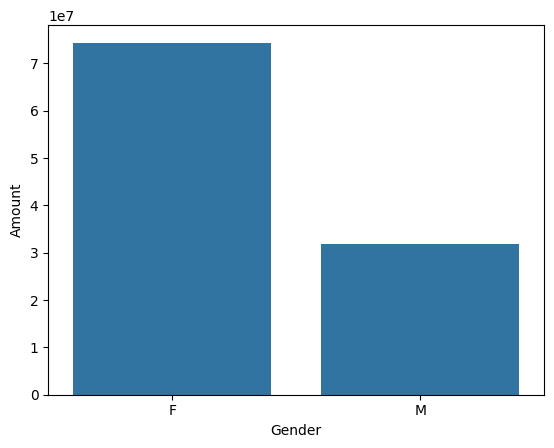

In [21]:
sns.barplot(x='Gender',y='Amount',data=sale_gen)

AGE


<Axes: xlabel='Age Group', ylabel='count'>

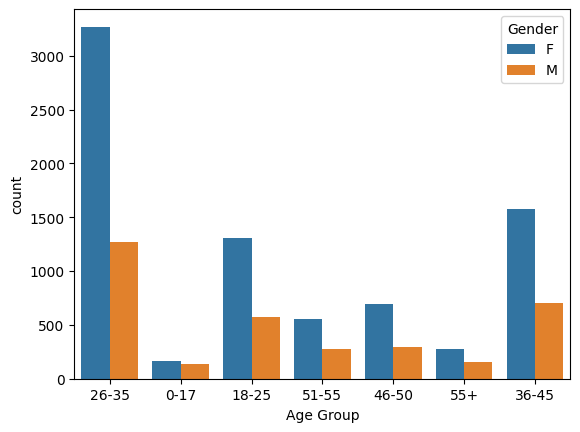

In [22]:
sns.countplot(x='Age Group',data=diwali_data, hue='Gender') # if we remove hue=gender we will recieve a graph without the gender classification

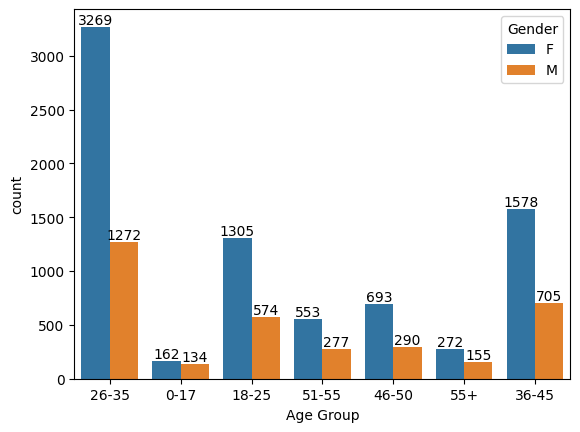

In [23]:
by=sns.countplot(x='Age Group',data=diwali_data, hue='Gender')
for bars in by.containers:
  by.bar_label(bars)

In [24]:
sales_age=diwali_data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

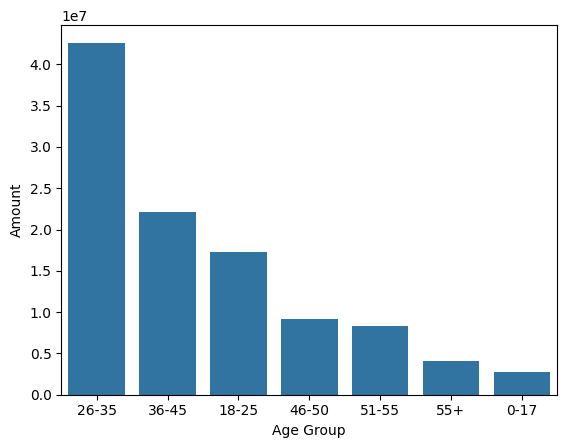

In [25]:
sns.barplot(x='Age Group',y='Amount',data=sales_age)

In [26]:
diwali_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

State

In [27]:
sale_state=diwali_data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
#head use kiaa ki sirf top 10 dikhe

<Axes: xlabel='State', ylabel='Orders'>

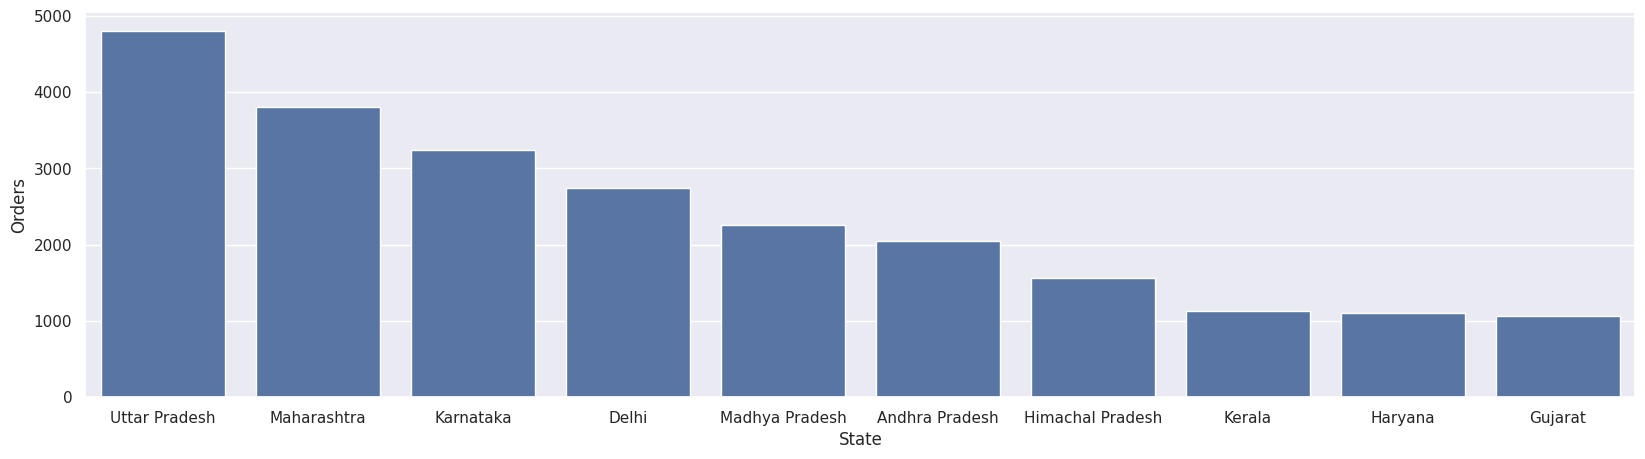

In [28]:
sns.set(rc={'figure.figsize':(20,5)}) #graph ki width set krna
sns.barplot(x='State',y='Orders',data=sale_state)

In [29]:
sale_state_amount=diwali_data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

<Axes: xlabel='State', ylabel='Amount'>

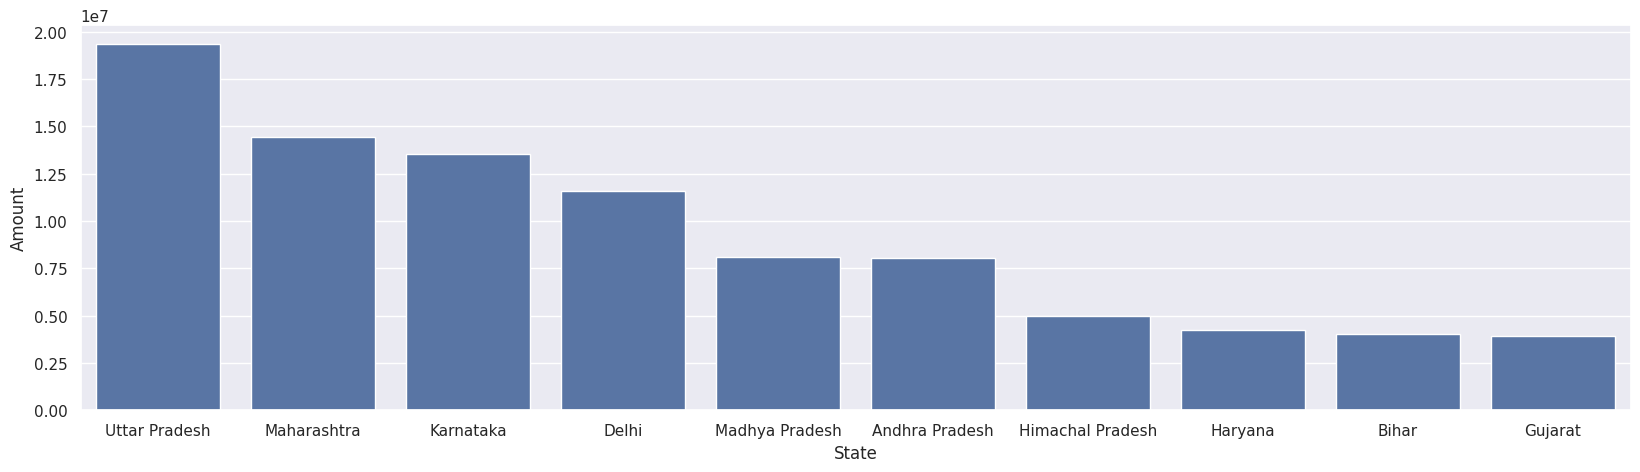

In [30]:
sns.set(rc={'figure.figsize':(20,5)}) #graph ki width set krna
sns.barplot(x='State',y='Amount',data=sale_state_amount)

Marital Status

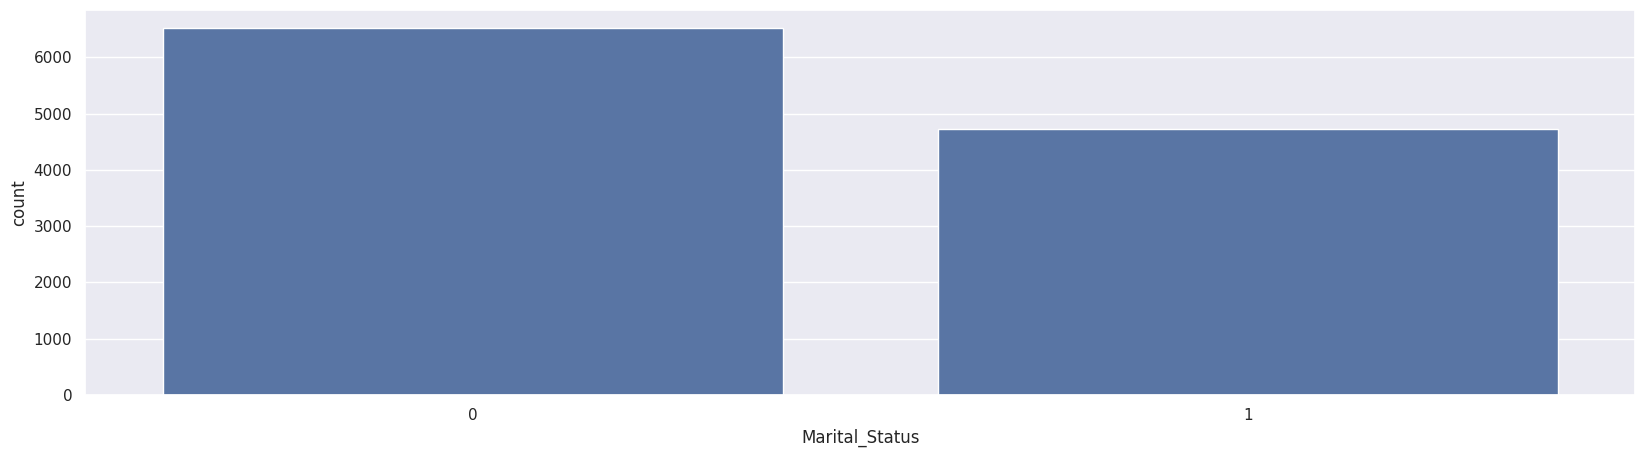

In [31]:
mx=sns.countplot(x='Marital_Status',data=diwali_data) #0-married, 1-not married

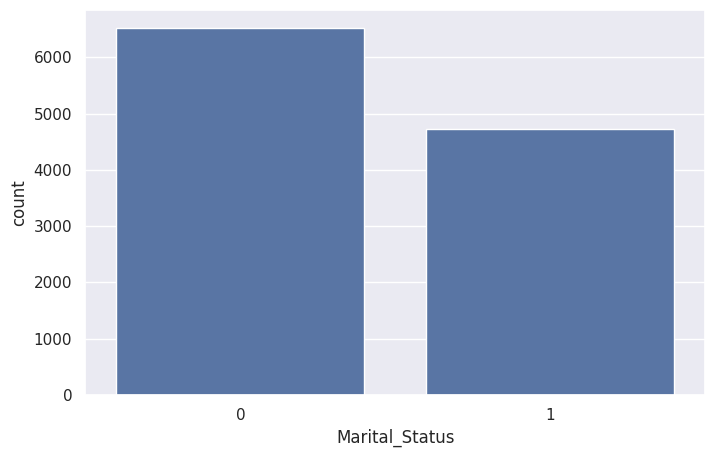

In [32]:
sns.set(rc={'figure.figsize':(8,5)}) #graph ki width set krna
sns.countplot(x='Marital_Status',data=diwali_data)
for bars in mx.containers:
  mx.bar_label(bars)
  plt.show()

In [33]:
import matplotlib
print(matplotlib.__version__)

3.10.0


Occupation


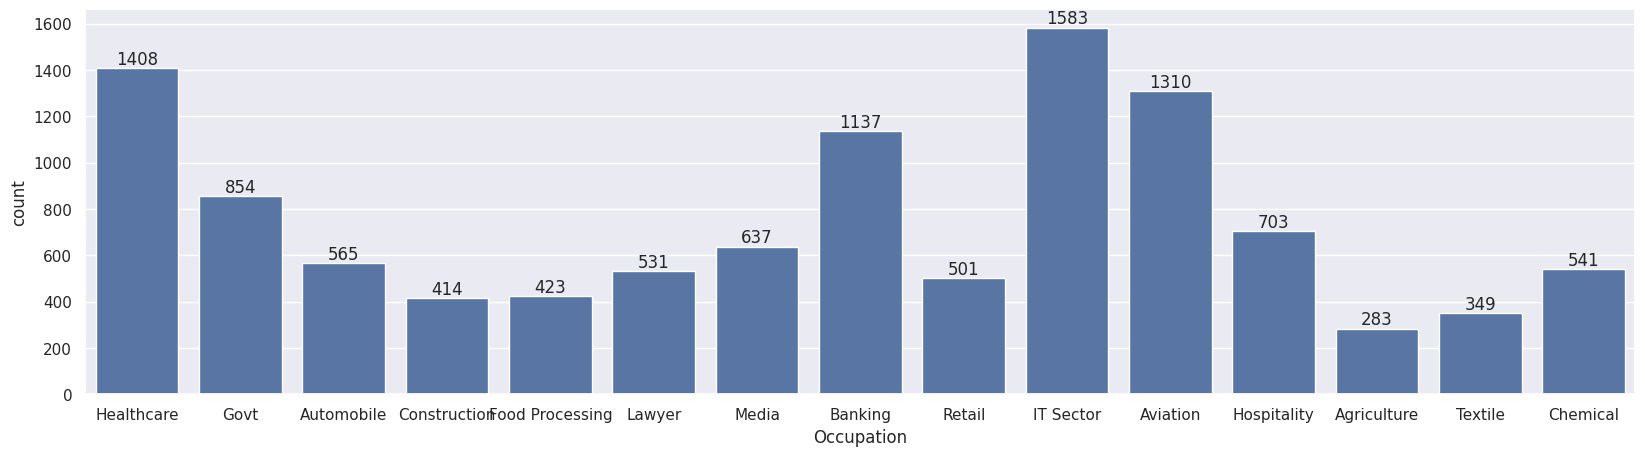

In [34]:
sns.set(rc={'figure.figsize':(20,5)})
ox=sns.countplot(x='Occupation',data=diwali_data)
for x in ox.containers:
  ox.bar_label(x)


In [35]:
sale_occupation=diwali_data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

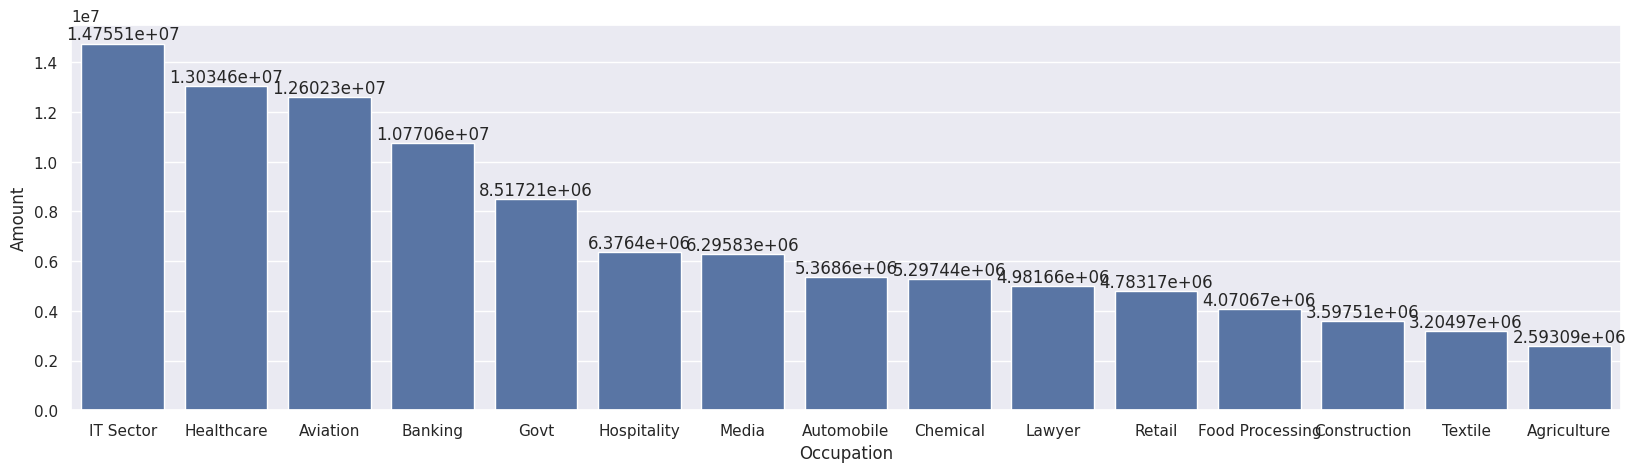

In [36]:
qp=sns.barplot(x='Occupation',y='Amount',data=sale_occupation)
for x in qp.containers:
  qp.bar_label(x)

product category

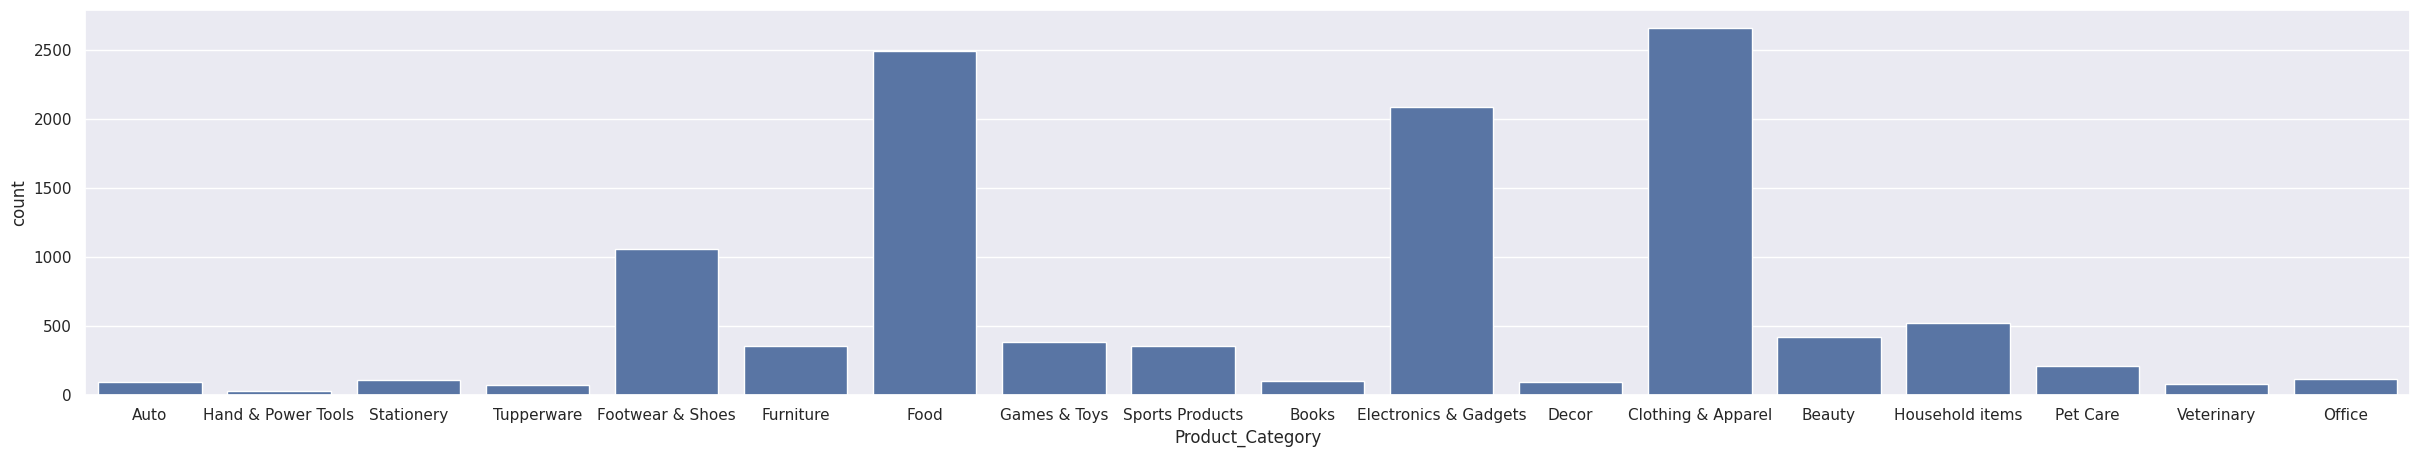

In [37]:
sns.set(rc={'figure.figsize':(30,5)})
sns.countplot(x='Product_Category',data=diwali_data)
for x in ax.containers:
  ax.bar_label(x)